In [1]:
!pip install yfinance
!pip install pandas_ta
!pip install scikit-learn
!pip install matplotlib
!pip install plotly
!pip install "notebook>=5.3" "ipywidgets>=7.5"
!pip install bokeh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=300753 sha256=5ea6a65dae2c0057d3a166518080b892063b08033bea6a9bee9dd2d8dbeefbbc
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=6b61792e81e67bb3408065a477b6762c5647f03fe09534f0dd6d38b91676990b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/__script__.py
/kaggle/input/__results__.html
/kaggle/input/input_requirements.txt
/kaggle/input/__script__.ipynb
/kaggle/input/__output__.json
/kaggle/input/custom.css


In [3]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Load data
df = yf.Ticker('^GSPC').history(period='max', interval='1d')
df = df[['Open', 'High', 'Low', 'Close']].dropna()  # Select relevant columns and drop NA
print(df.tail())
num_features = len(df.columns)

# Prepare target column
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the scaled data
df_scaled.tail()


                                  Open         High          Low        Close
Date                                                                         
2025-01-02 00:00:00-05:00  5903.259766  5935.089844  5829.529785  5868.549805
2025-01-03 00:00:00-05:00  5891.069824  5949.339844  5888.660156  5942.470215
2025-01-06 00:00:00-05:00  5982.810059  6021.040039  5960.009766  5975.379883
2025-01-07 00:00:00-05:00  5993.259766  6000.680176  5890.680176  5909.029785
2025-01-08 00:00:00-05:00  5910.660156  5922.029785  5882.640137  5916.859863


,Open,High,Low,Close,Target
24366,0.972198,0.972073,0.965251,0.965717,0.963568
24367,0.969491,0.972951,0.958778,0.963568,0.975714
24368,0.967489,0.975289,0.968510,0.975714,0.981122
24369,0.982556,0.987051,0.980254,0.981122,0.970220
24370,0.984272,0.983711,0.968843,0.970220,0.971506


In [4]:
X = []
backcandles = 30

df = np.array(df_scaled)

for i in range (num_features):
  X.append([])
  for j in range (backcandles, df.shape[0]):
    X[i].append(df[j-backcandles:j, i])

X = np.moveaxis(X, 0, 2)
#print(X[:10])

X, yi = np.array(X), np.array(df[backcandles:, -1])
y = np.reshape(yi, (len(yi), 1))
print(X)
print(y)
print(X.shape)
print(y.shape)

[[[0.0029003  0.00217535 0.00218251 0.00217882]
  [0.00291672 0.00219176 0.00219897 0.00219525]
  [0.00291015 0.00218519 0.00219238 0.00218868]
  ...
  [0.00287238 0.00214746 0.00215453 0.00215088]
  [0.00288223 0.0021573  0.0021644  0.00216074]
  [0.00288059 0.00215566 0.00216276 0.0021591 ]]

 [[0.00291672 0.00219176 0.00219897 0.00219525]
  [0.00291015 0.00218519 0.00219238 0.00218868]
  [0.00288223 0.0021573  0.0021644  0.00216074]
  ...
  [0.00288223 0.0021573  0.0021644  0.00216074]
  [0.00288059 0.00215566 0.00216276 0.0021591 ]
  [0.00286417 0.00213926 0.0021463  0.00214267]]

 [[0.00291015 0.00218519 0.00219238 0.00218868]
  [0.00288223 0.0021573  0.0021644  0.00216074]
  [0.0029003  0.00217535 0.00218251 0.00217882]
  ...
  [0.00288059 0.00215566 0.00216276 0.0021591 ]
  [0.00286417 0.00213926 0.0021463  0.00214267]
  [0.0028576  0.0021327  0.00213971 0.0021361 ]]

 ...

 [[0.96403697 0.97105103 0.96301753 0.97152584]
  [0.97131071 0.97058515 0.96388494 0.97154718]
  [0.97562

In [5]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [6]:
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras.callbacks import EarlyStopping

lstm_input = Input(shape=(backcandles, num_features), name='lstm_input')
inputs = LSTM(64, name='first_layer', activation='relu')(lstm_input)
output = Dense(1, activation='linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam,loss='mse',metrics=['mape'])

early_stopping = EarlyStopping(monitor='mape', patience=5, restore_best_weights=True)
model.fit(x=X_train,y=y_train,batch_size=15,epochs=32,callbacks=[early_stopping])

Epoch 1/32


I0000 00:00:1736355188.616293     145 service.cc:145] XLA service 0x7ed02c004d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736355188.616346     145 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1736355188.616352     145 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  36/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0023 - mape: 4499.1138

I0000 00:00:1736355189.731530     145 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.7154e-04 - mape: 572.9435
Epoch 2/32
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.4950e-06 - mape: 62.7870
Epoch 3/32
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.3630e-06 - mape: 33.9114
Epoch 4/32
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.1458e-06 - mape: 71.6399
Epoch 5/32
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.8289e-06 - mape: 76.5686
Epoch 6/32
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.2677e-06 - mape: 51.6528
Epoch 7/32
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.5272e-06 - mape: 45.8651
Epoch 8/32
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.3094e-06 - mape: 28.9197


In [7]:
from sklearn.metrics import mean_absolute_percentage_error,max_error, mean_squared_error, r2_score
import numpy as np


y_pred = model.predict(X_test)

# Reshape y_test and y_pred to 1D if necessary
y_test = np.squeeze(y_test)
y_pred = np.squeeze(y_pred)

# Calculate performance metrics
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
mse = mean_squared_error(y_test, y_pred)
max_error = max_error(y_test, y_pred)

# Print the metrics
print(f"MAPE: {mape:.4f}%")
print(f"MSE: {mse:.8f}")
print(f"MAX Error: {max_error:.8f}")

for i in range(10):
    print(y_test[i],y_pred[i])



153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAPE: 3.4319%
MSE: 0.00053131
MAX Error: 0.08804881
0.1994160268885231 0.19559953
0.20194154831242828 0.19604798
0.2024295591791803 0.19629252
0.20165893125067177 0.19682713
0.20327085140212234 0.19754112
0.20311969439875846 0.1979534
0.201581687935922 0.1985122
0.2009178687976089 0.19902577
0.20101151954717178 0.19910483
0.20268425552057023 0.19890812


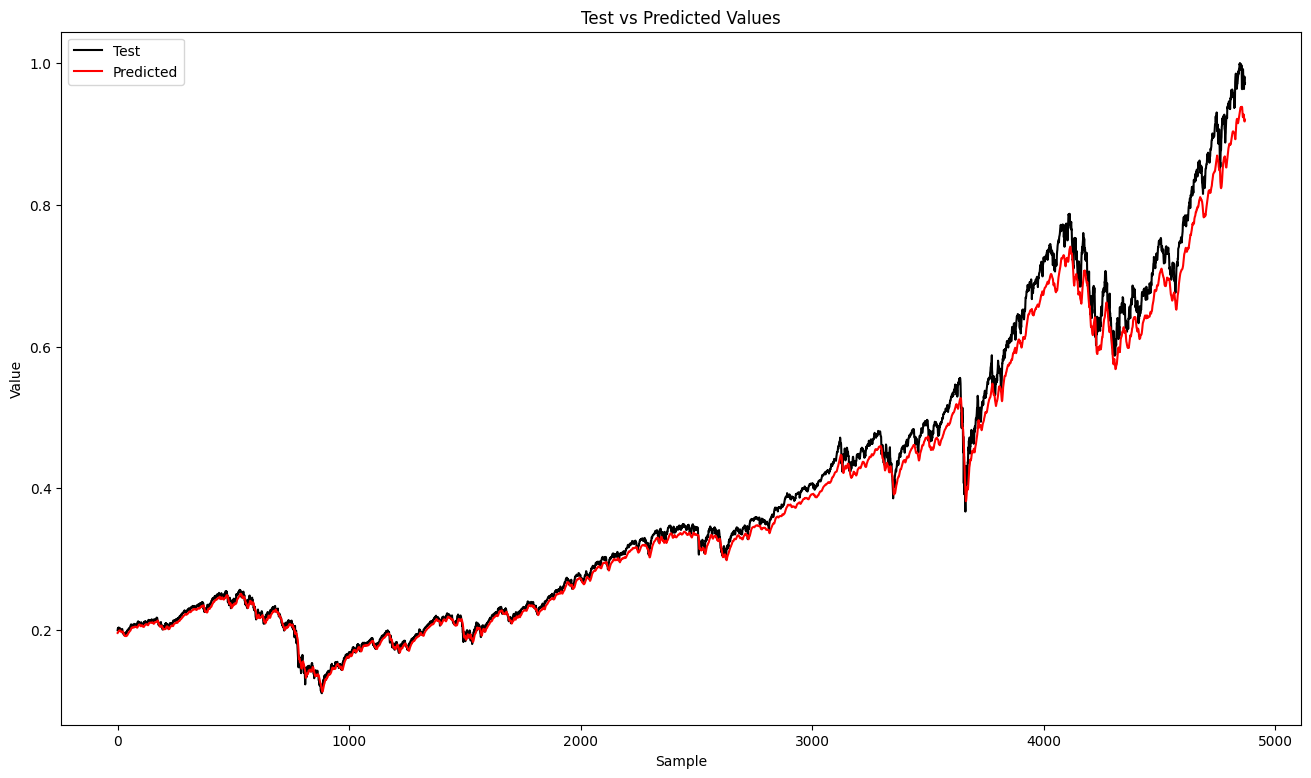

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots

plt.figure(figsize=(16,9))
plt.plot(y_test, color='black', label='Test')
plt.plot(y_pred, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Test vs Predicted Values')
plt.legend()
plt.show()


In [9]:
from bokeh.plotting import figure, show, output_notebook
import numpy as np

# Enable Bokeh output in the notebook
output_notebook()

x = np.arange(len(y_test))   # Sample numbers from 1 to 100

# Create a figure
p = figure(title="Test vs Predicted Values (Interactive)",
           x_axis_label='Sample',
           y_axis_label='Value',
           width=800,
           height=400)

# Add Test line
p.line(x, y_test, legend_label="Test", line_width=2, color="black")

# Add Predicted line
p.line(x, y_pred, legend_label="Predicted", line_width=2, color="red")

# Show the plot
show(p)

Loading BokehJS ...